# Texter: Controlling the formatting of tick labels

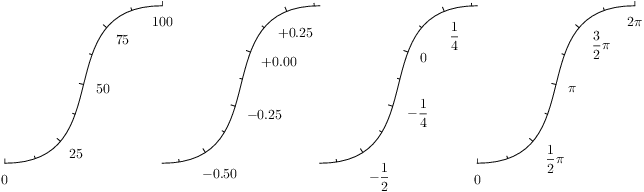

In [1]:
import math
from pyx import *
from pyx.graph import axis

texter1 = axis.texter.decimal(plus="+", minus="-", equalprecision=1)
texter2 = axis.texter.rational()

class piaxis(axis.linear):

    def __init__(self, divisor=math.pi,
                 texter=axis.texter.rational(suffix="\pi"), **kwargs):
        axis.linear.__init__(self, divisor=divisor, texter=texter, **kwargs)

p1 = path.path(path.moveto(0, 0), path.curveto(3, 0, 1, 4, 4, 4))
p2 = p1.transformed(trafo.translate(4, 0))
p3 = p2.transformed(trafo.translate(4, 0))
p4 = p3.transformed(trafo.translate(4, 0))

c = canvas.canvas()
c.insert(axis.pathaxis(p1, axis.linear(min=0, max=1e2)))
c.insert(axis.pathaxis(p2, axis.linear(min=-0.7, max=0.4, texter=texter1)))
c.insert(axis.pathaxis(p3, axis.linear(min=-0.7, max=0.4, texter=texter2)))
c.insert(axis.pathaxis(p4, piaxis(min=0, max=2*math.pi)))
c

Texters do the formatting of the tick labels: They create the strings which are
then passed to the painter. You can choose between fractions and decimal
numbers with/without an exponential part.  The `texter` should not be mixed
up with the `painter`: The `painter` is afterwards doing the TeXing and finally
creates the labels -- the `texter` prepares the string that is to be processed
by TeX.

The first example shows the default behavior, which chooses either decimal and
exponential formatting.

The second example is for special purpose only (because it is ugly), in case
that it is strictly necessary to have the same width of all labels.

The third example shows how to create fractions instead of decimal numbers.

<img src="http://pyx.sourceforge.net/bend.png" align="left"> At the rightmost axis we also show how to create a special piaxis. Here, some
axis parameters are altered to fit an pi-scaled axis nicely. Futhermore,
instead of just creating a special axis instance by setting the divisor and
texter parameters, a `piaxis` class is created which just alters the defaults
of the linear axis it is based at.
